# Proyecto de limpieza de datos
Autor: Iñaki Sebastián Orozco García    

Fecha: 24/11/2024

- Imputación de datos faltantes             <- Elegida 
- Codificación de variables categóricas     <- Elegida (Con la marca del disco duro)
- Transformación de potencia
- Escalamiento                              <- Elegida (Beneficia a la LSTM)
- Discretización

### Importar el set de datos en un dataframe de pandas

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
folder_path = '../data/external/data_Q3_2024/data_Q3_2024'

df = pd.DataFrame()
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv") and file_name.startswith("2024-07-0"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.concat([df, pd.read_csv(file_path)], ignore_index=True)
        print(file_path, ' done')

../data/external/data_Q3_2024/data_Q3_2024\2024-07-01.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-02.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-03.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-04.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-05.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-06.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-07.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-08.csv  done
../data/external/data_Q3_2024/data_Q3_2024\2024-07-09.csv  done


### Analizamos el dataframe 

In [14]:
print(df.head())

         date   serial_number                 model  capacity_bytes  failure  \
0  2024-07-01  PL1331LAGXN3AH  HGST HDS5C4040ALE630   4000787030016        0   
1  2024-07-01  PL2331LAGSTSYJ  HGST HMS5C4040ALE640   4000787030016        0   
2  2024-07-01  S2ZYJ9FG405079         ST500LM012 HN    500107862016        0   
3  2024-07-01        Z3056CGY           ST4000DM000   4000787030016        0   
4  2024-07-01        Z305FT10           ST4000DM000   4000787030016        0   

  datacenter  cluster_id  vault_id  pod_id  pod_slot_num  ...  \
0       sac0           0      1021       0          39.0  ...   
1       sac0           0      1021       0           0.0  ...   
2       sac0           0      1021       0           NaN  ...   
3       sac0           0      1021       0          21.0  ...   
4       sac0           0      1021       0          29.0  ...   

   smart_250_normalized  smart_250_raw  smart_251_normalized  smart_251_raw  \
0                   NaN            NaN           

In [36]:
for column in df.columns:
    if column == 'smart_1_normalized':
        break
    print(f"Column: {column}")
    print(f"Type: {df[column].dtype}")
    print(f"Top 3 most occurring elements: {df[column].value_counts().head(3).to_dict().keys()}")
    print(f"Number of NaN values: {df[column].isna().sum()}")
    print("\n")

Column: date
Type: object
Top 3 most occurring elements: dict_keys(['2024-07-01', '2024-07-04', '2024-07-08'])
Number of NaN values: 0


Column: serial_number
Type: object
Top 3 most occurring elements: dict_keys(['PL1331LAGXN3AH', '8160A0RSFVKG', '8160A0YNFVKG'])
Number of NaN values: 0


Column: model
Type: object
Top 3 most occurring elements: dict_keys(['TOSHIBA MG08ACA16TA', 'TOSHIBA MG07ACA14TA', 'ST16000NM001G'])
Number of NaN values: 0


Column: capacity_bytes
Type: int64
Top 3 most occurring elements: dict_keys([16000900661248, 12000138625024, 14000519643136])
Number of NaN values: 0


Column: failure
Type: int64
Top 3 most occurring elements: dict_keys([0, 1])
Number of NaN values: 0


Column: datacenter
Type: object
Top 3 most occurring elements: dict_keys(['phx1', 'sac0', 'sac2'])
Number of NaN values: 162176


Column: cluster_id
Type: int64
Top 3 most occurring elements: dict_keys([0, 40, 50])
Number of NaN values: 0


Column: vault_id
Type: int64
Top 3 most occurring elem

Esto es lo que se hará con las columnas del dataframe:

- date: Nada, nos sirve para la LSTM.
- serial_number: Variable categórica.
- model: Variable categórica, se va a dividir dos variables: Empresa y modelo.
- capacity_bytes: Variable categórica.
- failure: Nada, solo es una variable booleana.
- datacenter: Eliminarla, no es reelevante para nosotros le sirve a la empresa que comparte el set de datos.
- cluster_id: Eliminarla, no es reelevante para nosotros le sirve a la empresa que comparte el set de datos.
- vault_id: Eliminarla, no es reelevante para nosotros le sirve a la empresa que comparte el set de datos.
- pod_id: Eliminarla, no es reelevante para nosotros le sirve a la empresa que comparte el set de datos.
- pod_slot_num: Eliminarla, no es reelevante para nosotros le sirve a la empresa que comparte el set de datos.

# PENDIENTE 
- is_legacy_format: Pendiente, tengo que investigar

y también los smart que son de dos tipos:
- smart_normalized
- smart_raw

In [40]:
for column in df.columns:
    nan_count = df[column].isna().sum()
    if nan_count > 0:
        print(f"Column: {column}, NaN values: {nan_count}")

Column: datacenter, NaN values: 162176
Column: pod_slot_num, NaN values: 38464
Column: smart_1_normalized, NaN values: 6574
Column: smart_1_raw, NaN values: 6574
Column: smart_2_normalized, NaN values: 997203
Column: smart_2_raw, NaN values: 997203
Column: smart_3_normalized, NaN values: 30328
Column: smart_3_raw, NaN values: 30328
Column: smart_4_normalized, NaN values: 30328
Column: smart_4_raw, NaN values: 30328
Column: smart_5_normalized, NaN values: 20813
Column: smart_5_raw, NaN values: 20813
Column: smart_7_normalized, NaN values: 30328
Column: smart_7_raw, NaN values: 30328
Column: smart_8_normalized, NaN values: 997203
Column: smart_8_raw, NaN values: 997203
Column: smart_9_normalized, NaN values: 4023
Column: smart_9_raw, NaN values: 4023
Column: smart_10_normalized, NaN values: 30328
Column: smart_10_raw, NaN values: 30328
Column: smart_11_normalized, NaN values: 2597935
Column: smart_11_raw, NaN values: 2597935
Column: smart_12_normalized, NaN values: 4023
Column: smart_12_

### Imputación de datos faltantes

Empezamos con un mapa de calor

In [20]:
df_nan=df.isna()
df_nan.head()

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


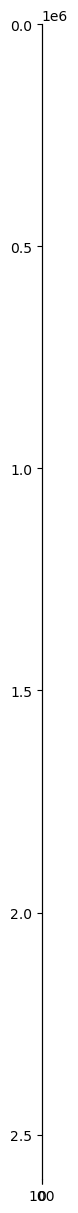

In [21]:
plt.figure(figsize=(5,15))
plt.imshow(df_nan)

(2600599, 175)

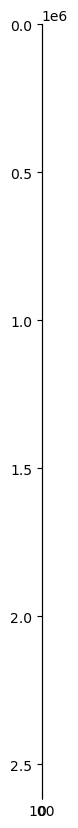

In [23]:
# Eliminamos la filas (variables) cuyas columnas sean todas NaN
df.dropna(how='all')

df_var=df.dropna(thresh=5) # Elimina la filas que tengan menos de 5 observaciones
df_var.head()

# Eliminamos las observaciones que no tengan registros
df.dropna(axis=1)

# Eliminamos las observaciones que estén vacías
df.dropna(axis=1,how='all')

# Eliminamos las variables que no tienen observaciones y las observaciones que estén vacías
df_obs=df.dropna(axis=1,how='all')
df_obsvar=df_obs.dropna(thresh=5)
plt.figure(figsize=(3,10))
plt.imshow(df_obsvar.isna())
df_obsvar.shape

In [ ]:
df.shape

In [25]:
# Index eliminados
print(set(df.index)-set(df_obsvar.index))

set()


array([[<Axes: title={'center': 'capacity_bytes'}>,
        <Axes: title={'center': 'failure'}>,
        <Axes: title={'center': 'cluster_id'}>,
        <Axes: title={'center': 'vault_id'}>,
        <Axes: title={'center': 'pod_id'}>,
        <Axes: title={'center': 'pod_slot_num'}>,
        <Axes: title={'center': 'smart_1_normalized'}>,
        <Axes: title={'center': 'smart_1_raw'}>,
        <Axes: title={'center': 'smart_2_normalized'}>,
        <Axes: title={'center': 'smart_2_raw'}>,
        <Axes: title={'center': 'smart_3_normalized'}>,
        <Axes: title={'center': 'smart_3_raw'}>,
        <Axes: title={'center': 'smart_4_normalized'}>,
        <Axes: title={'center': 'smart_4_raw'}>],
       [<Axes: title={'center': 'smart_5_normalized'}>,
        <Axes: title={'center': 'smart_5_raw'}>,
        <Axes: title={'center': 'smart_7_normalized'}>,
        <Axes: title={'center': 'smart_7_raw'}>,
        <Axes: title={'center': 'smart_8_normalized'}>,
        <Axes: title={'cente

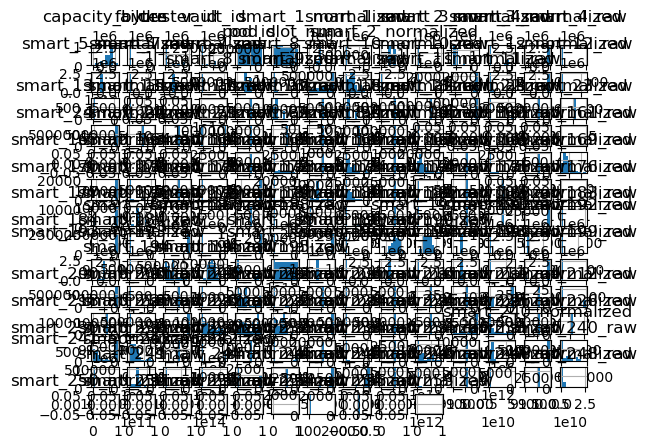

In [26]:
df.hist()

In [27]:
df.kurt()

TypeError: could not convert string to float: '2024-07-01'

In [ ]:
df.boxplot()

### Codificación de variables categóricas

### Escalamiento